# Let's import the Libraries to be used:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import  plotly



import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

In [2]:
from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest
import missingno as msno

In [3]:
import warnings

warnings.filterwarnings("ignore", message=".*cannot be placed.*")


In [4]:
plt.style.use('seaborn-darkgrid')


# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\836852743.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## Let's import the data

In [88]:
target_variable_names=["yield_strength",
"ultimate_tensile_strength",]
target = target_variable_names[0]

In [89]:
X_train=pd.read_csv('data/train.csv',)
y_train=X_train[target_variable_names]
X_train.drop(columns=["Unnamed: 0"], inplace=True)


X_valid=pd.read_csv('data/validation.csv')
y_valid=X_valid[target_variable_names]
X_valid.drop(columns=["Unnamed: 0"],inplace=True)


X_test=pd.read_csv('data/test.csv')
y_test=X_test[target_variable_names]
X_test.drop(columns=["Unnamed: 0"],inplace=True)


In [90]:
def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns

In [91]:
categorical_features=get_categorical_variables(X_train).tolist()
numeric_features=get_numerical_variables(X_train).tolist()

# Analyse the loss of information due to NaN targets

In [92]:
def diagnostic_plots(df, variable, target, lib='matplotlib'):
    if lib == 'matplotlib' or lib == 'pyplot':
        # Verifica se a variável tem valores não nulos
        if not df[variable].isna().all():

            # Define o tamanho da figura
            plt.figure(figsize=(16, 4))

            # Subconjunto onde o target é NaN
            nan_target = df[df[target].isna()][variable].dropna()
            not_nan_target = df[~df[target].isna()][variable].dropna()

            # Histogramas separados por target NaN e não NaN
            plt.subplot(1, 3, 1)
            sns.histplot(nan_target, kde=True, color='red', stat="density", label='Target NaN')
            sns.histplot(not_nan_target, kde=True, color='green', stat="density", label='Target not NaN')
            plt.legend()
            plt.title(f'Histogram of {variable}')

            # Q-Q plot
            ax = plt.subplot(1, 3, 2)
            stats.probplot(df[variable].dropna(), dist="norm", plot=plt)
            ax.get_lines()[0].set_markersize(7.0)
            ax.get_lines()[0].set_markerfacecolor('#44B1A5')
            ax.get_lines()[0].set_color('#44B1A5')

            ax.get_lines()[1].set_markerfacecolor('#FF7627')
            plt.ylabel('RM quantiles')

            # Boxplot com separação por target NaN e não NaN
            plt.subplot(1, 3, 3)
            # Convertendo os valores booleanos para strings para evitar o erro
            sns.boxplot(x=df[target].isna().astype(str), y=df[variable], palette={"True": "red", "False": "green"})
            plt.title(f'Boxplot of {variable}')

            plt.suptitle(f'Distribution of {variable}', fontsize=16)
            plt.show()

        else:
            print(f'The variable {variable} is all NaNs!')
    else:
        print('Choose lib equals to "matplotlib" or "plotly"!')


C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




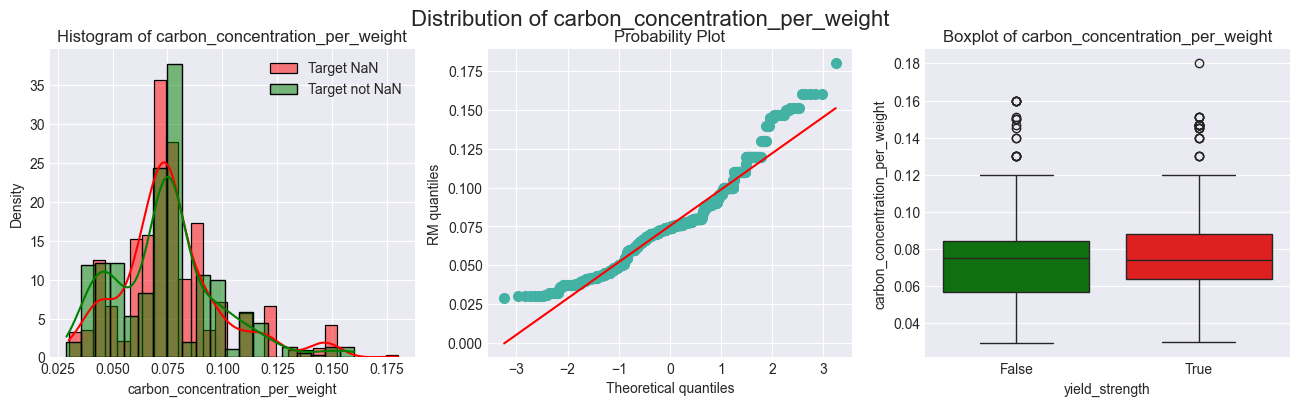

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




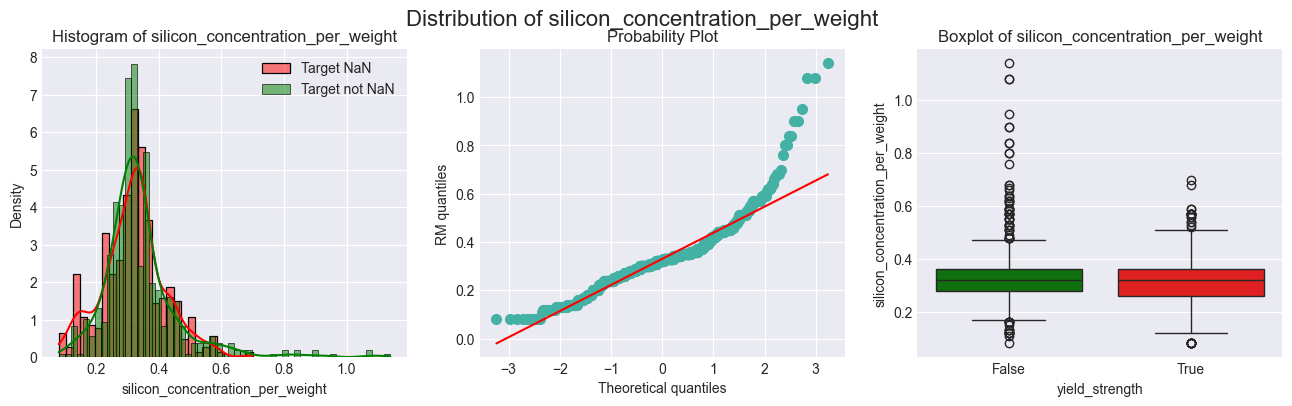

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




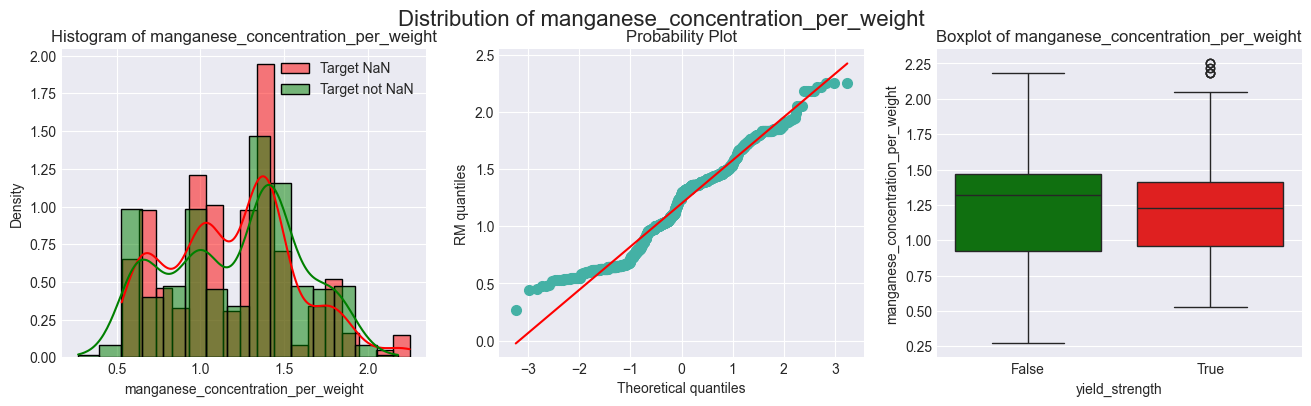

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




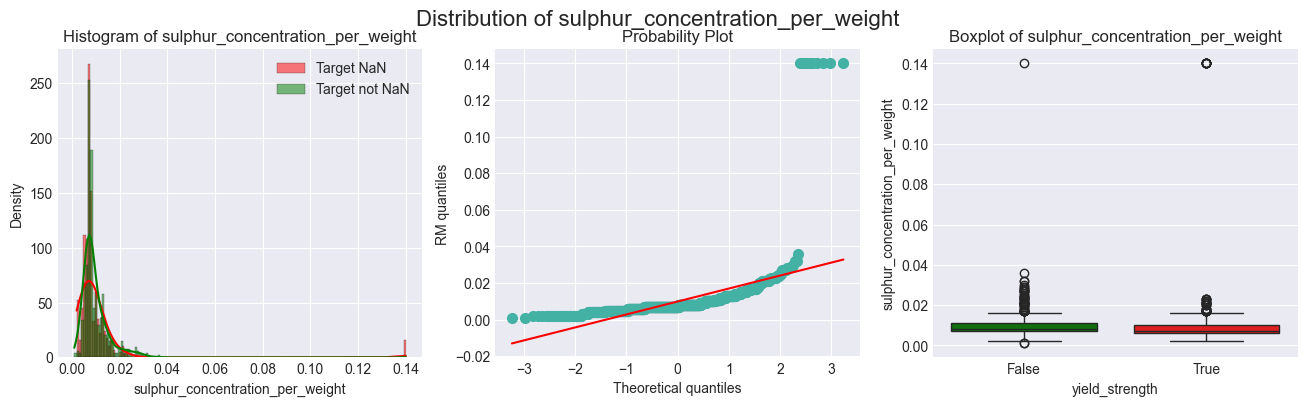

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




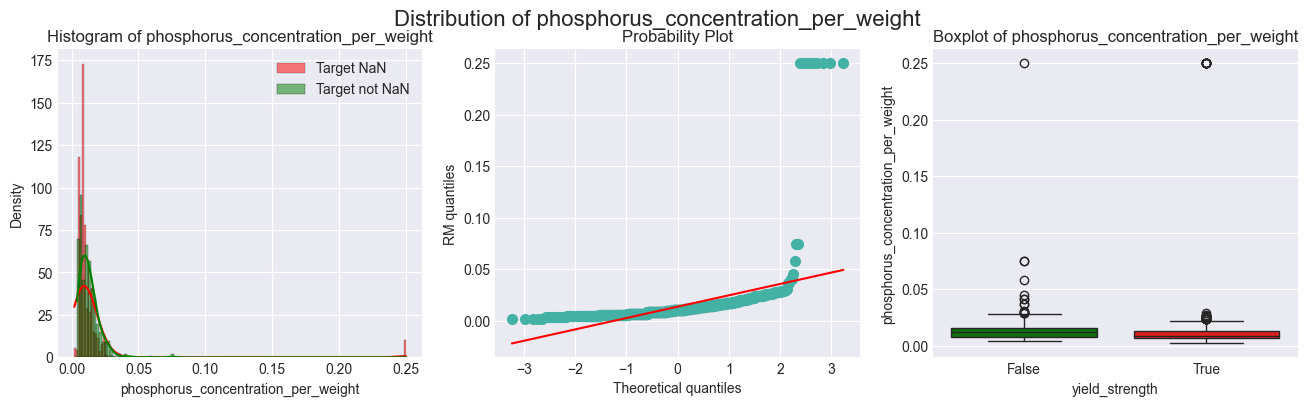

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




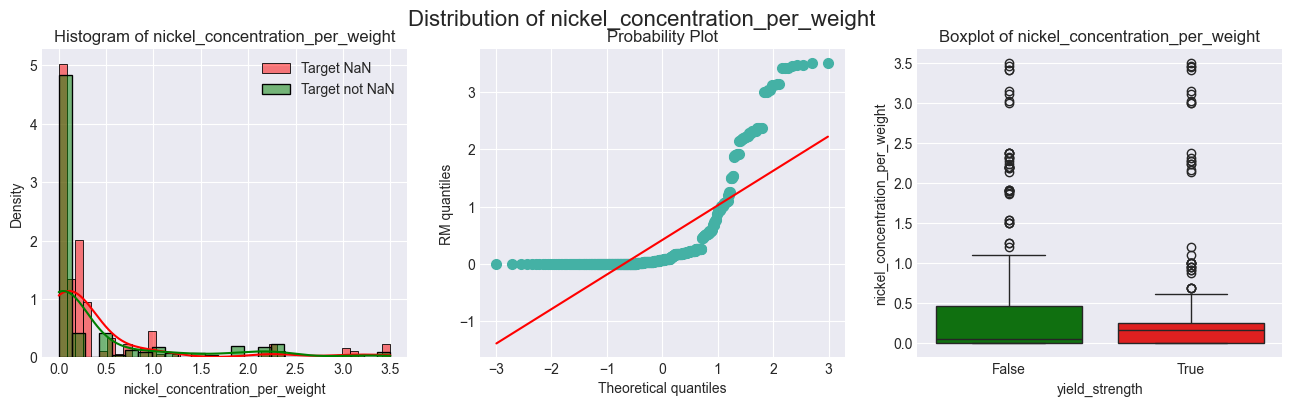

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




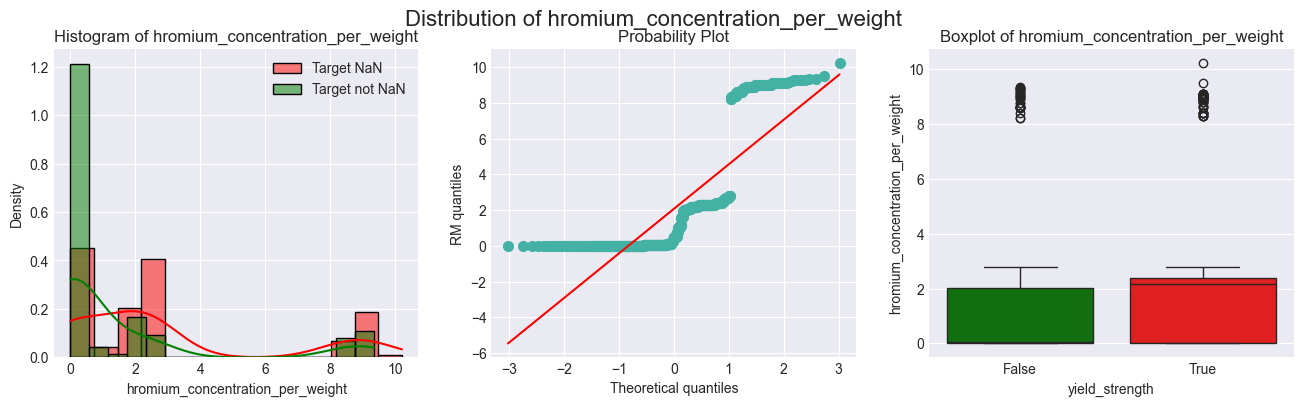

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




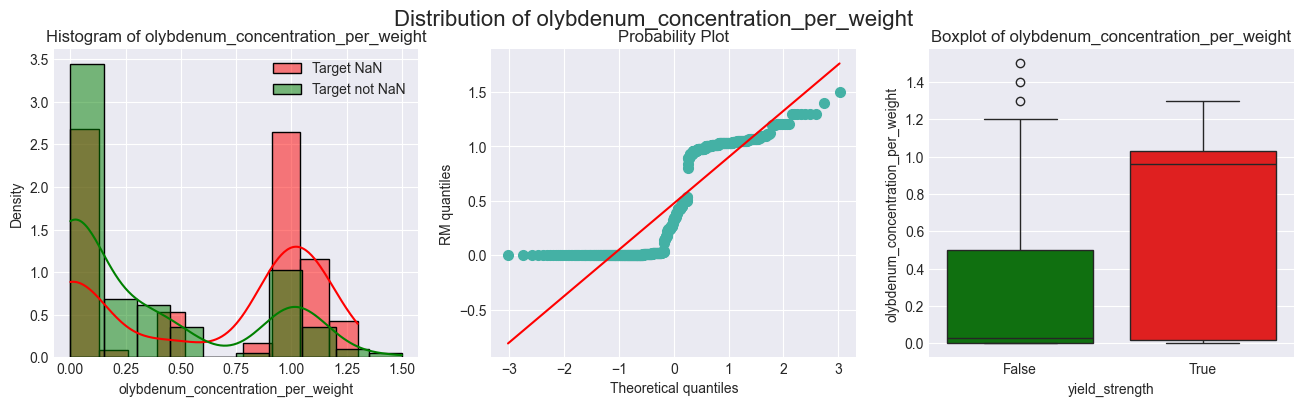

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




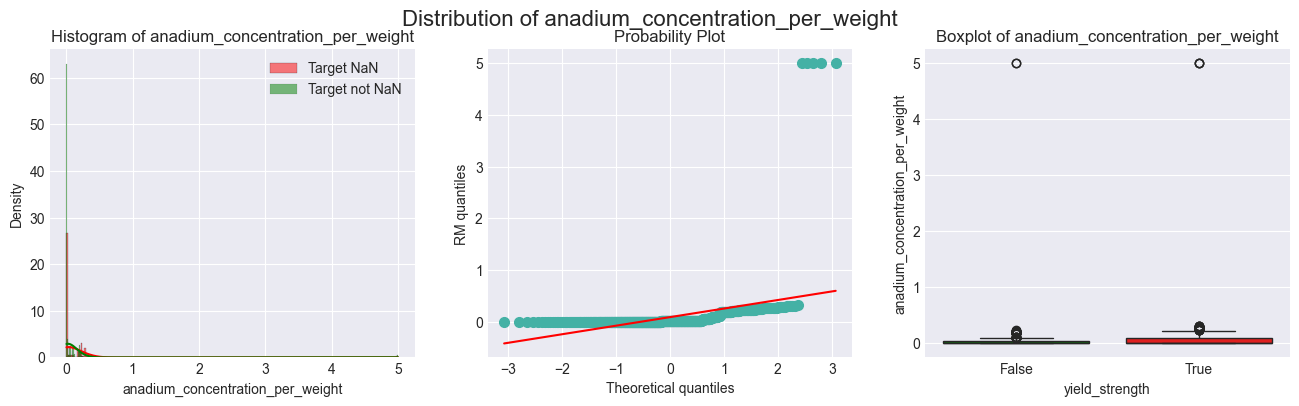

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




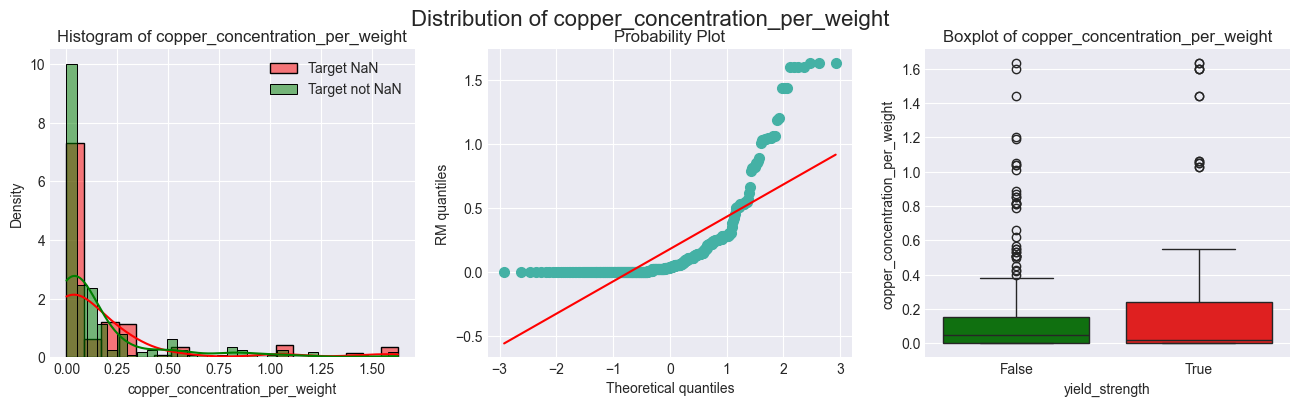

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




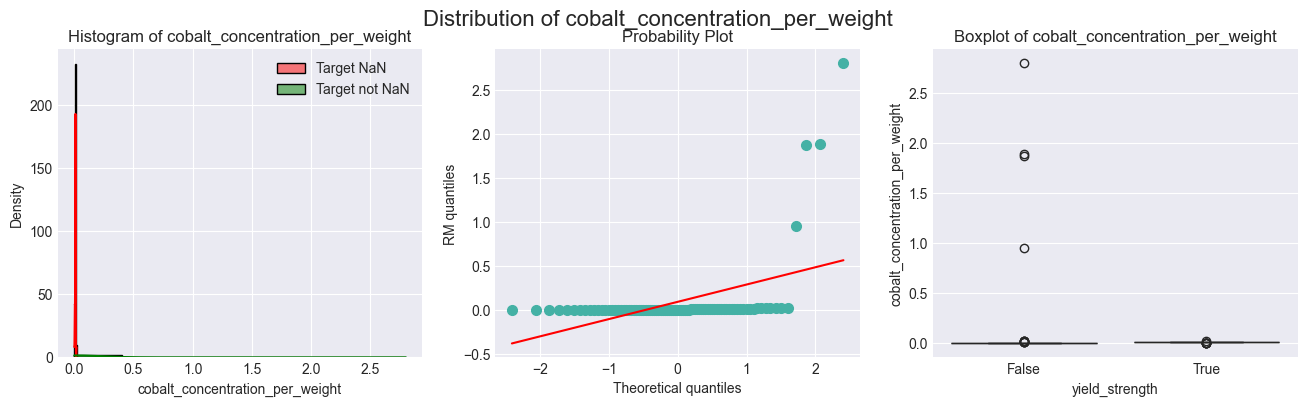

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




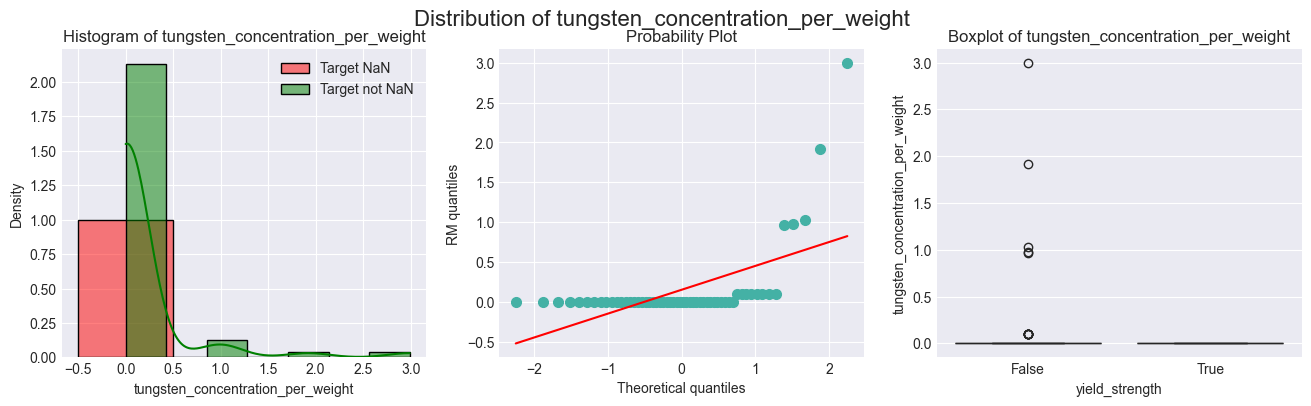

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




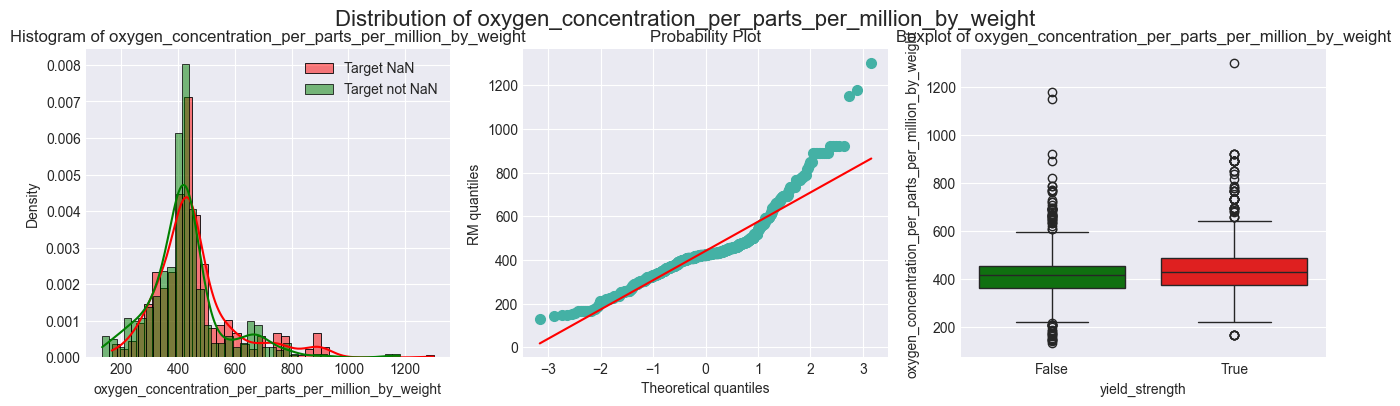

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




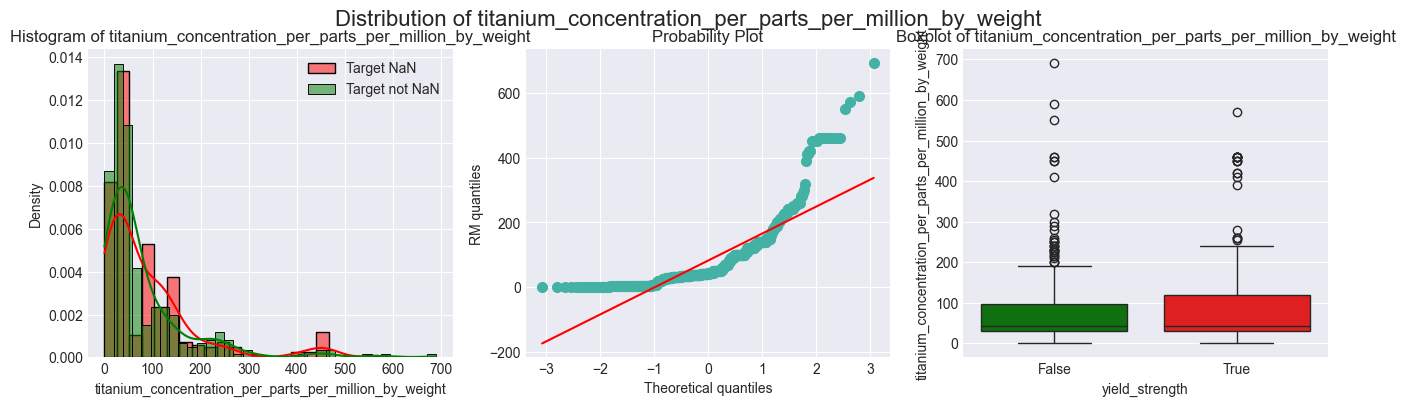

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




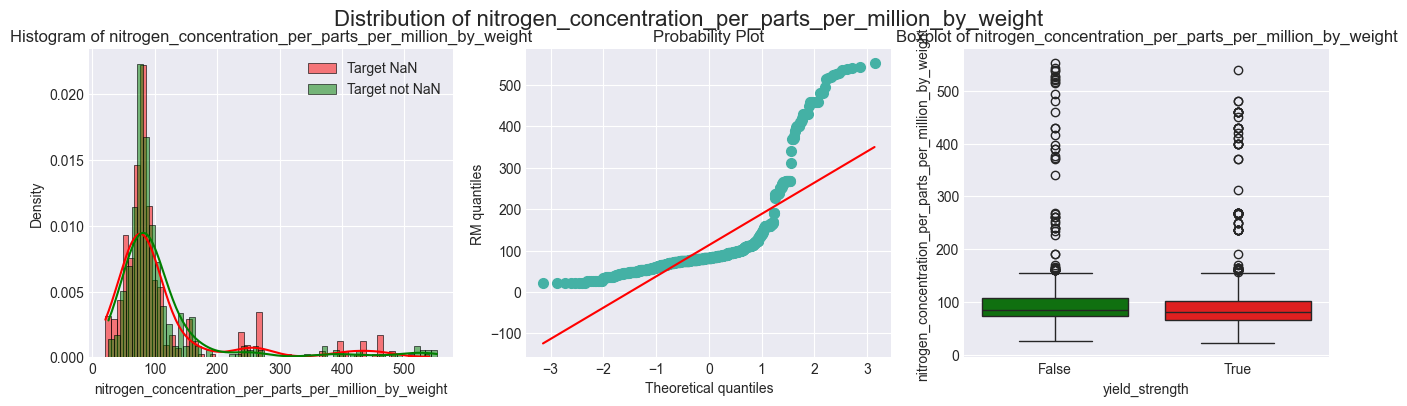

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




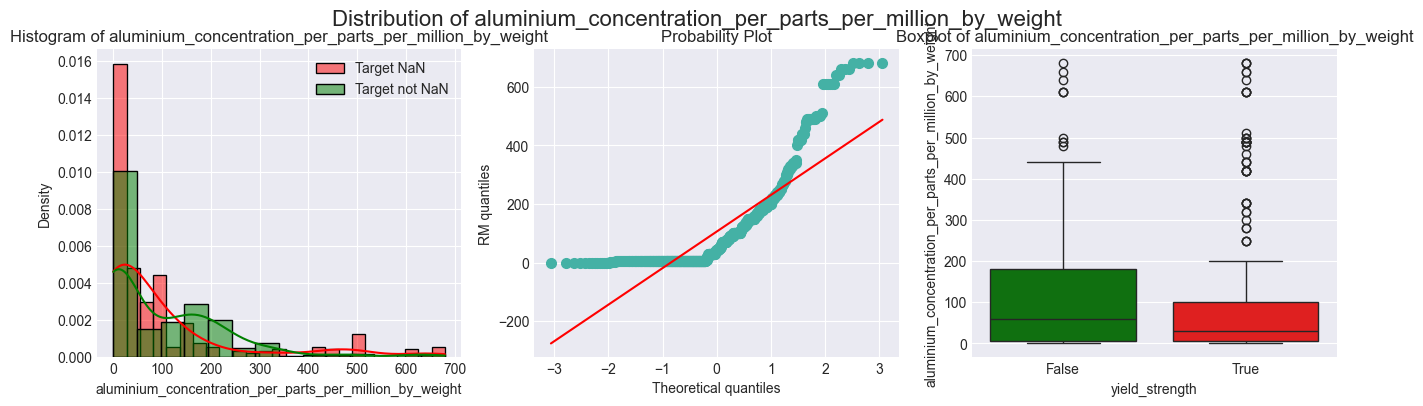

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




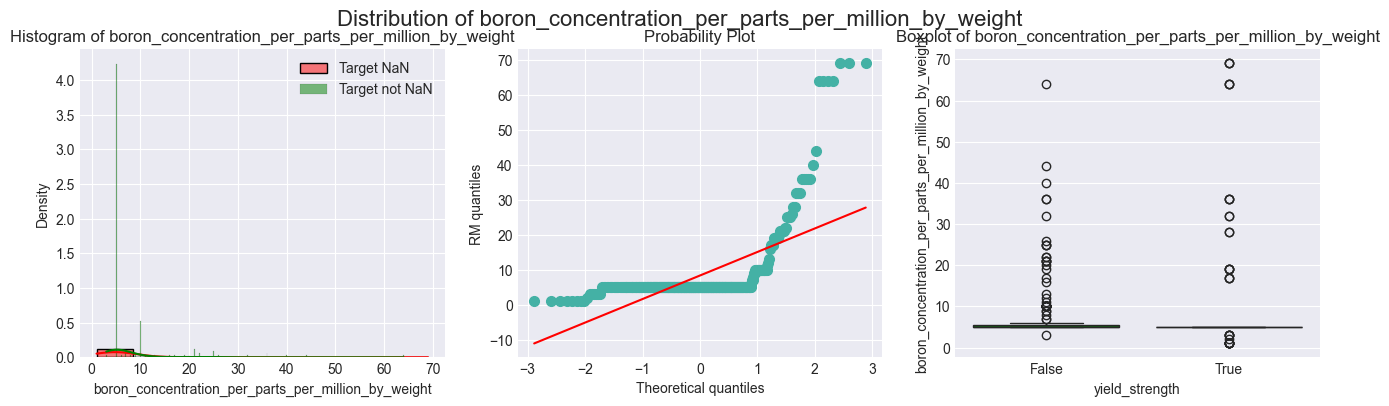

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




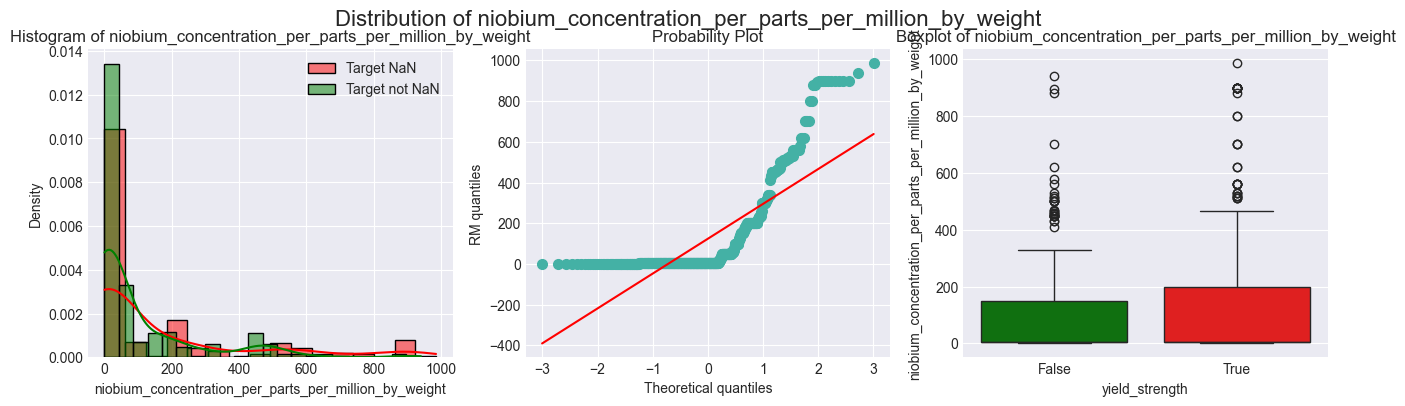

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




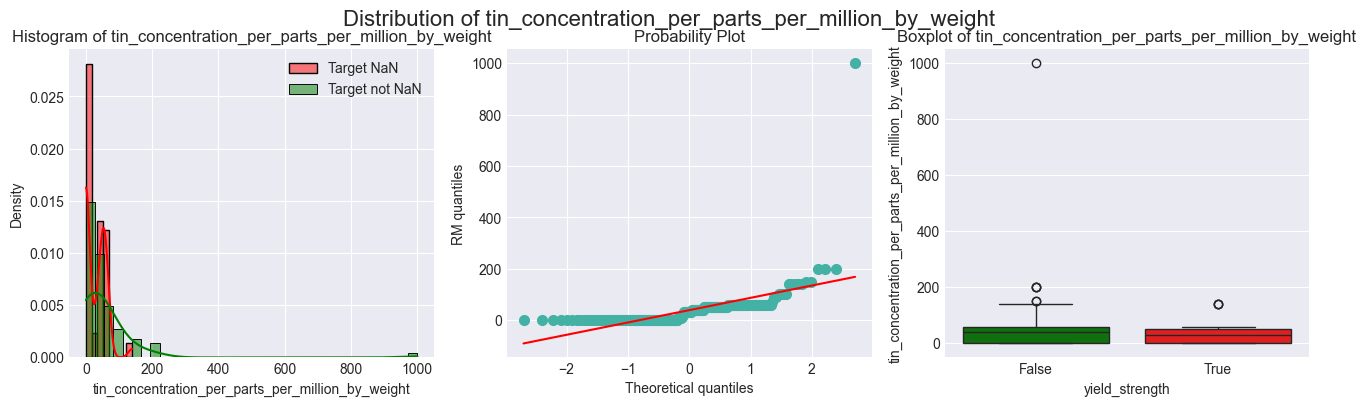

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




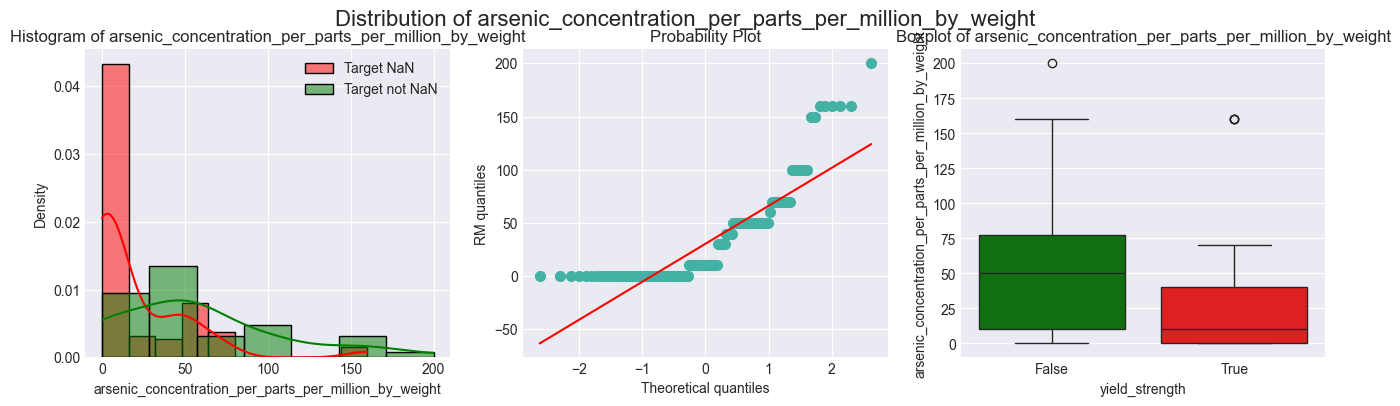

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




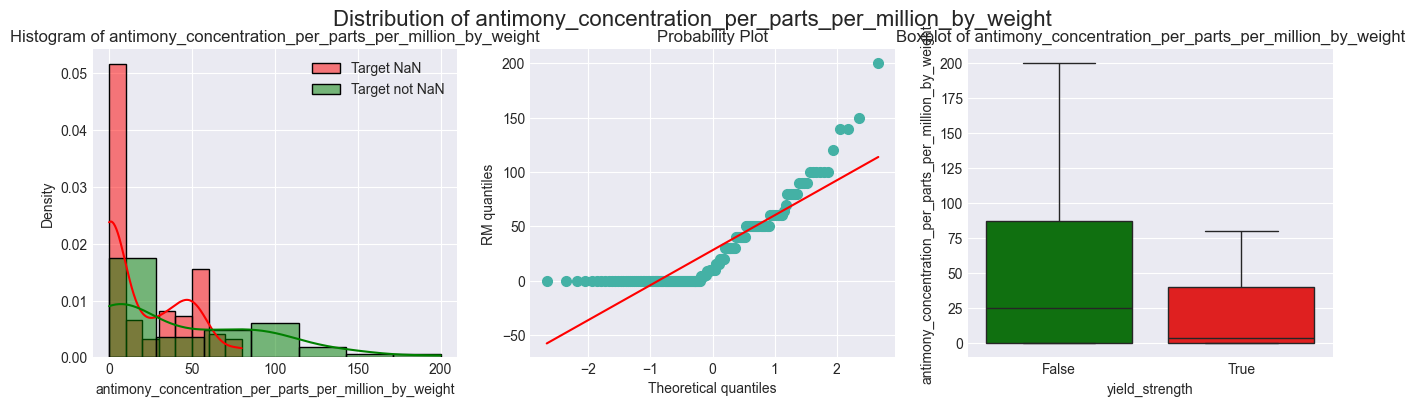

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




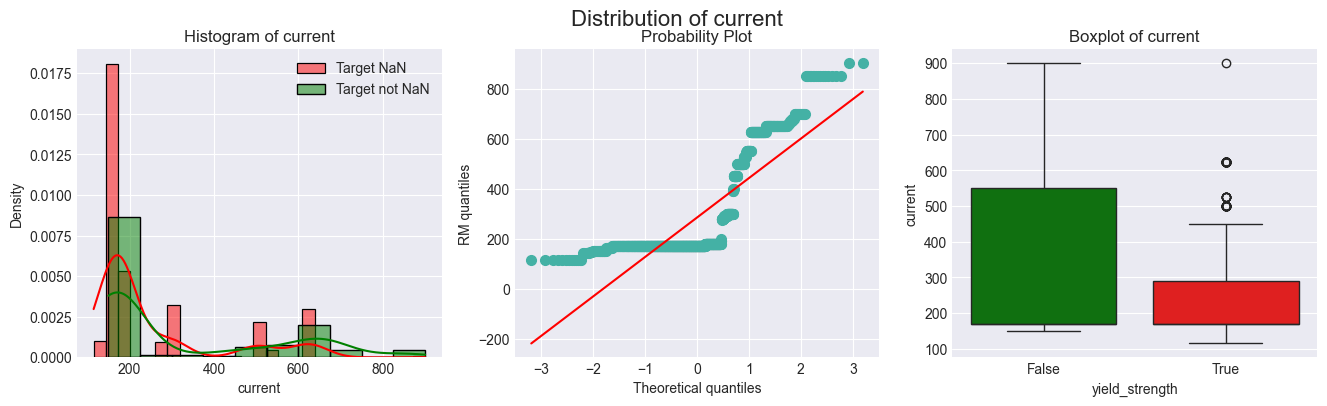

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




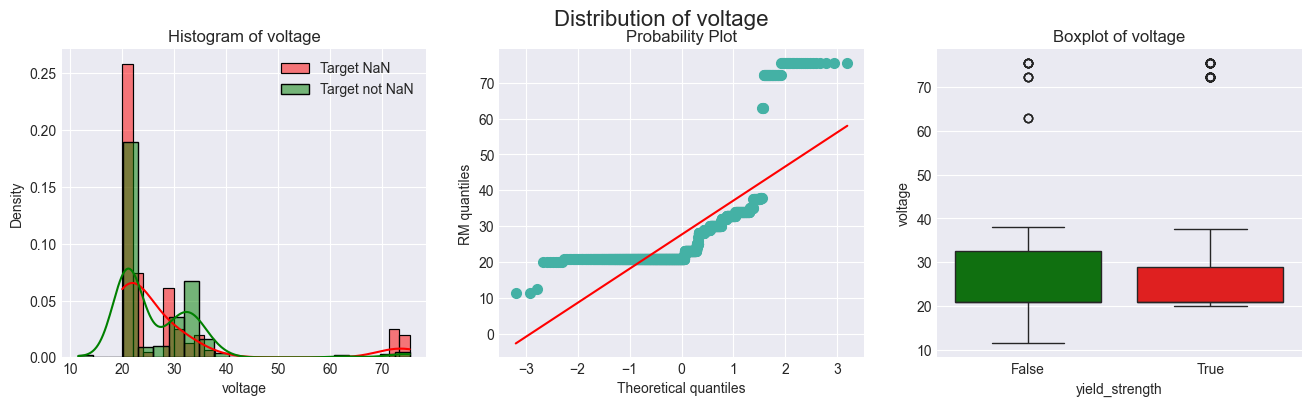

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




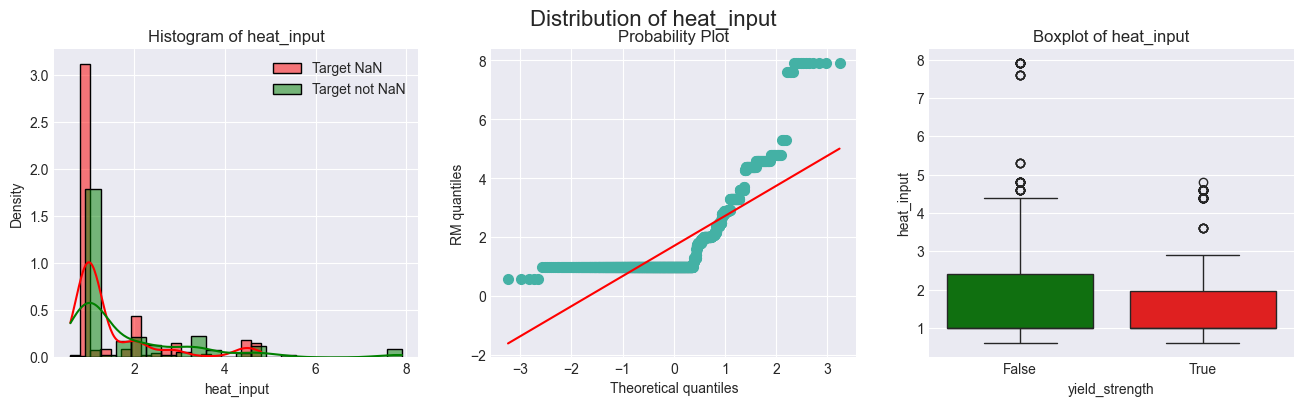

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




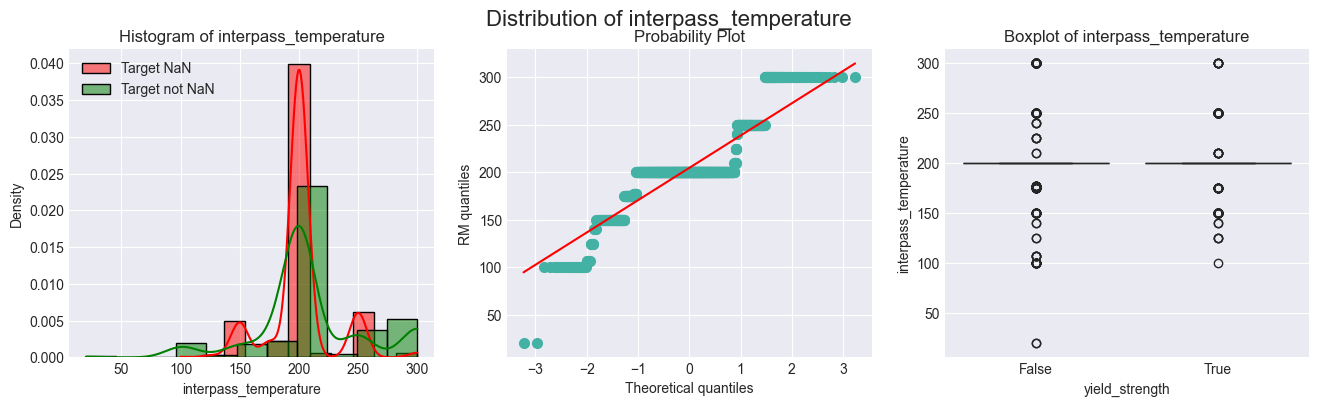

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




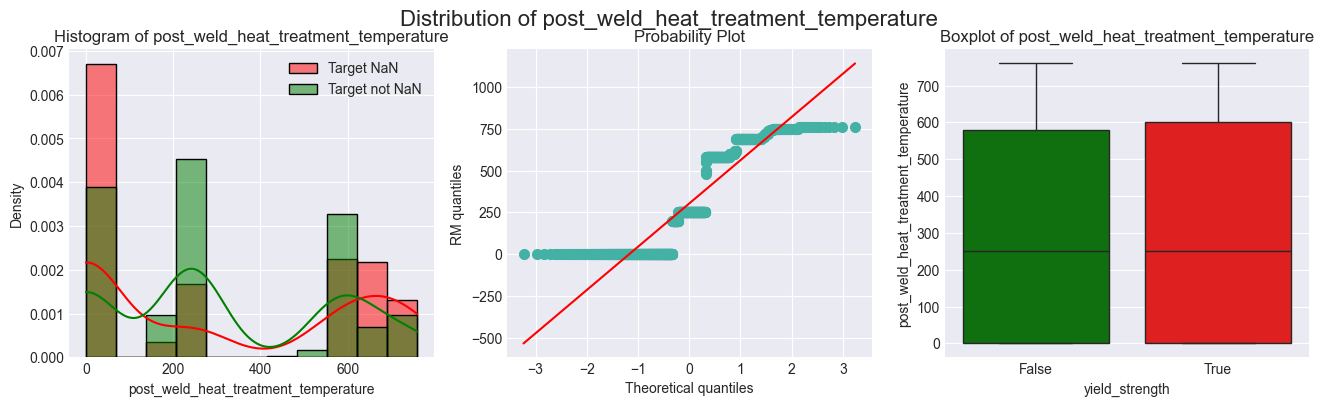

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




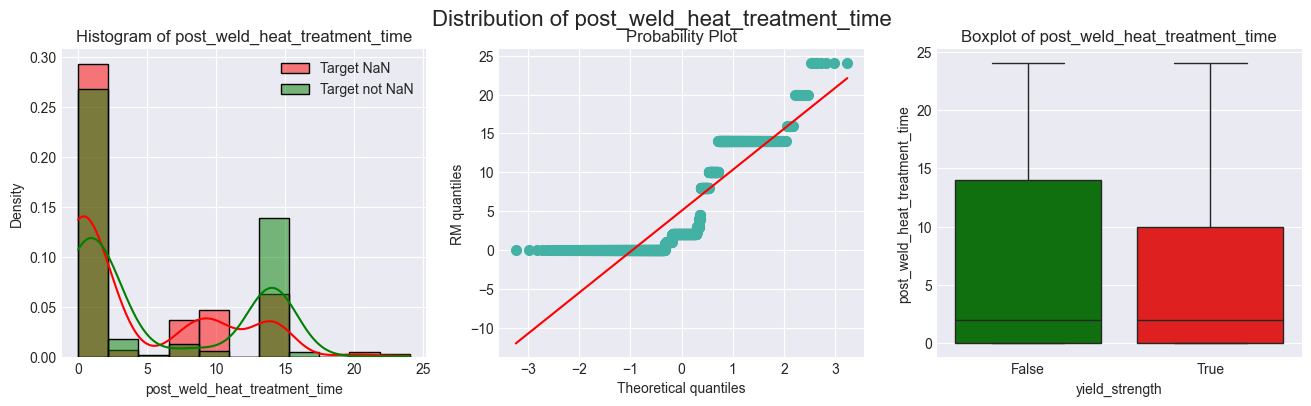

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




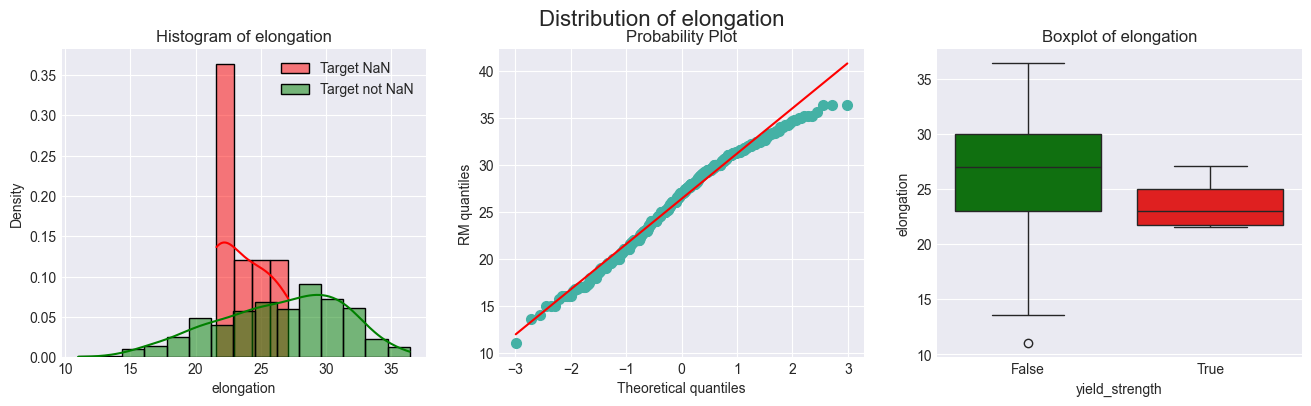

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




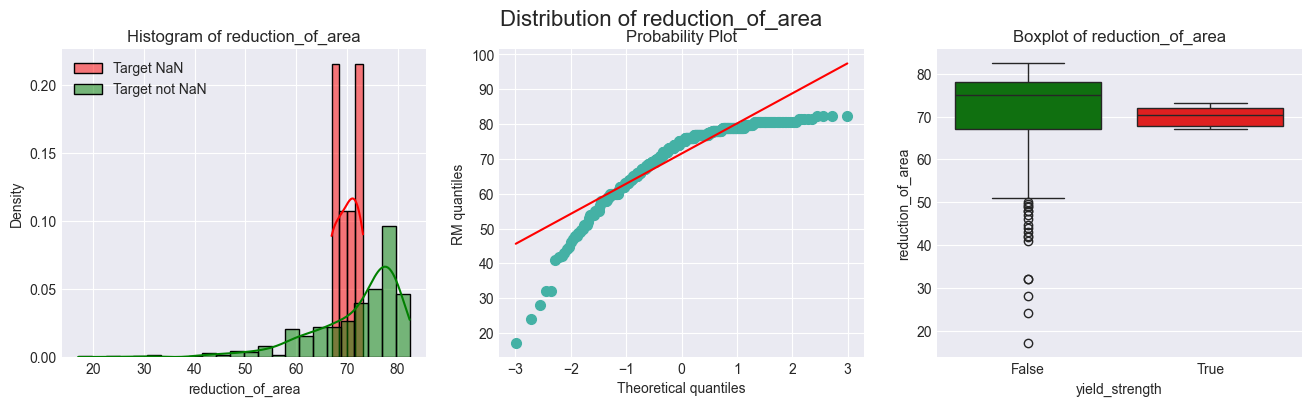

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




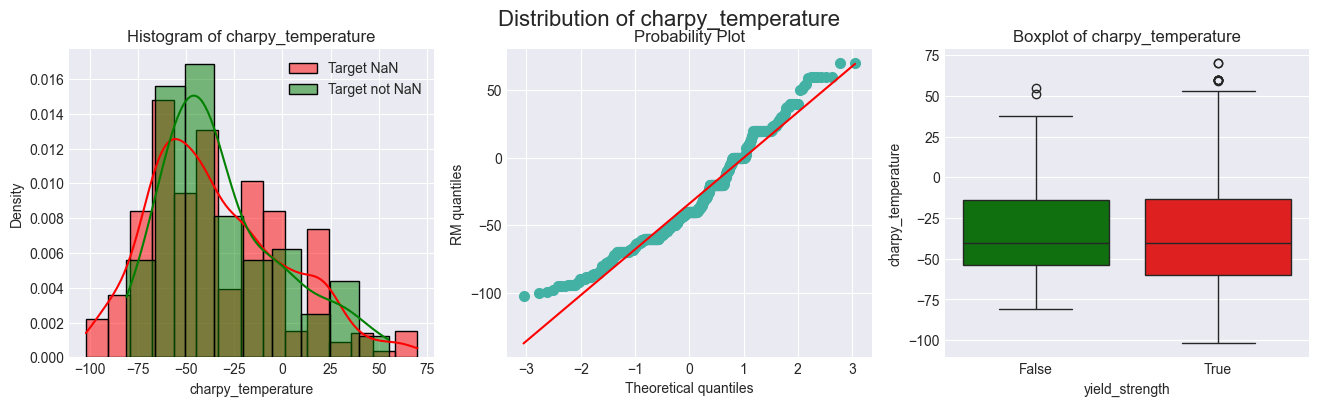

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




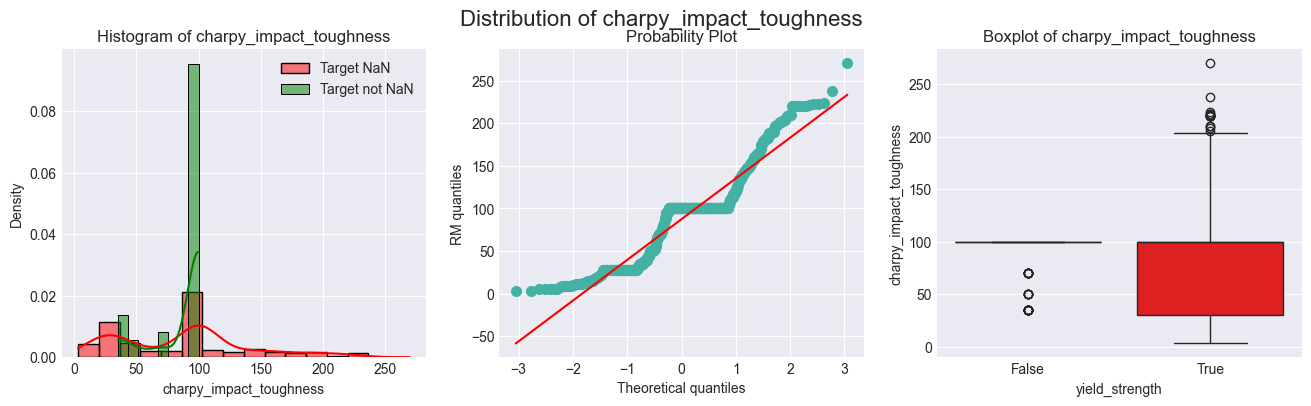

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




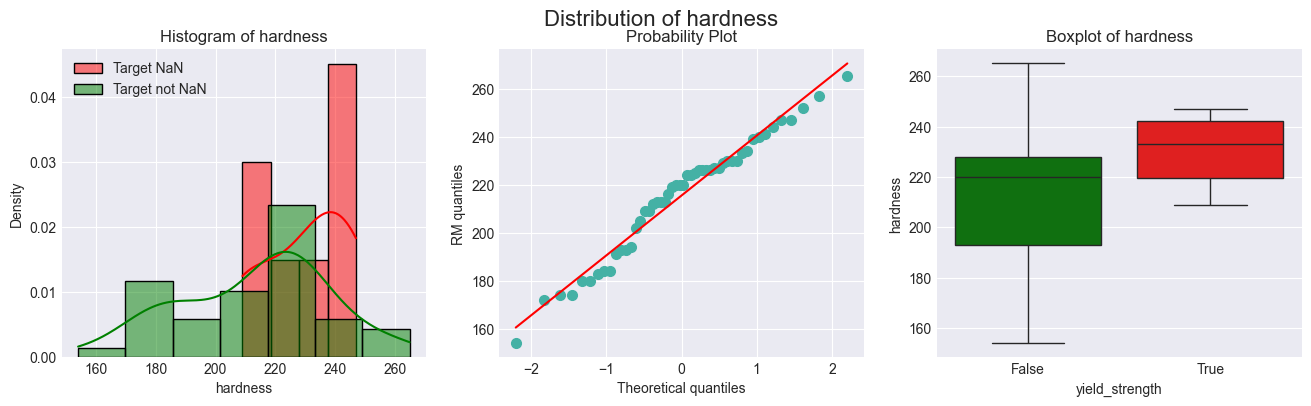

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




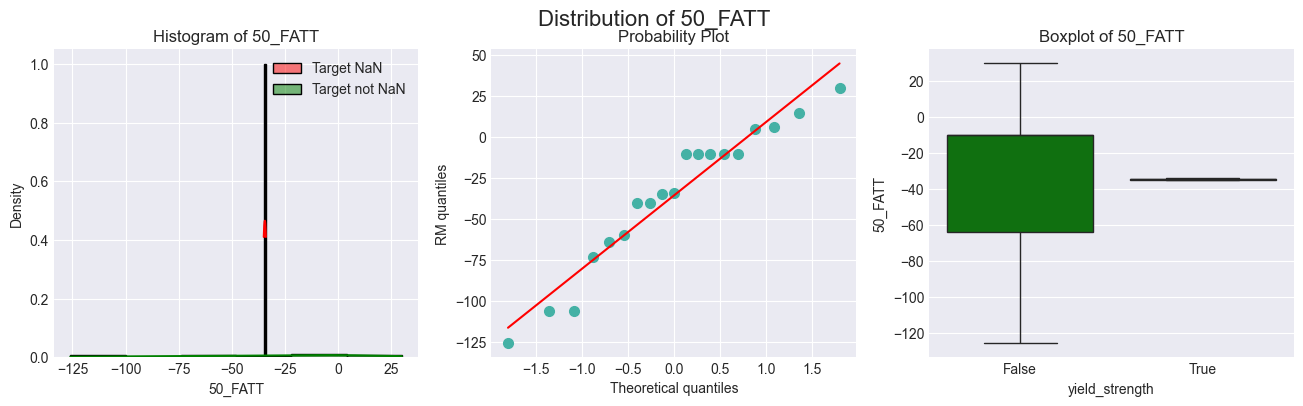

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




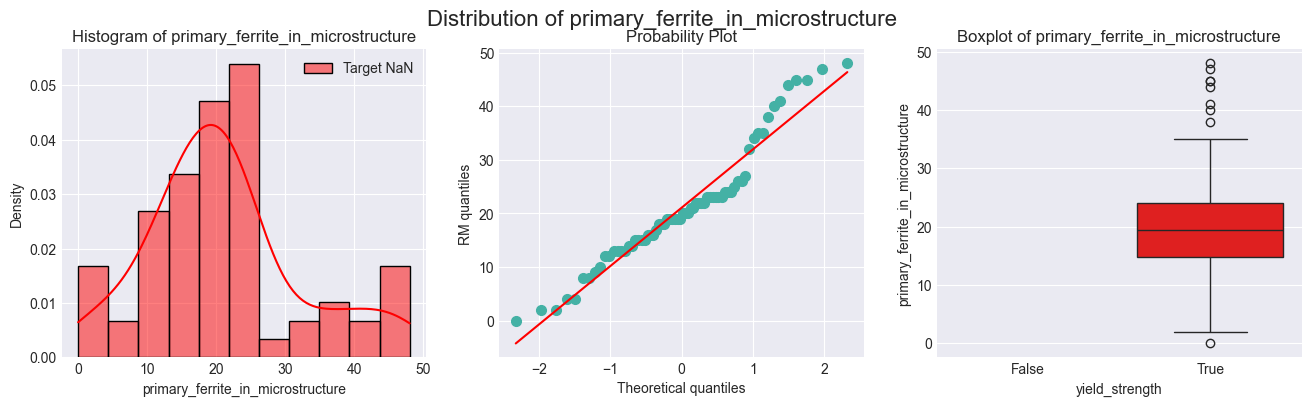

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




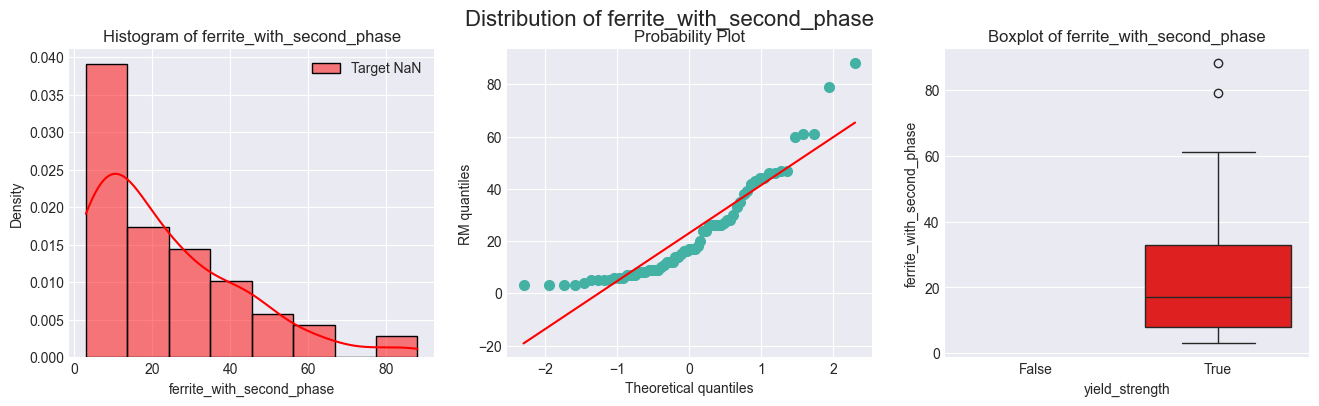

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




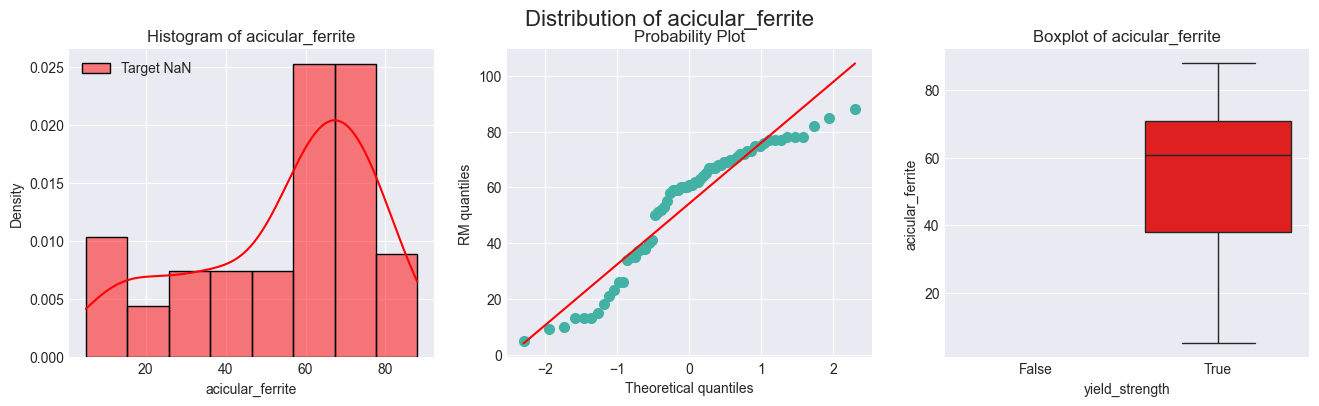

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




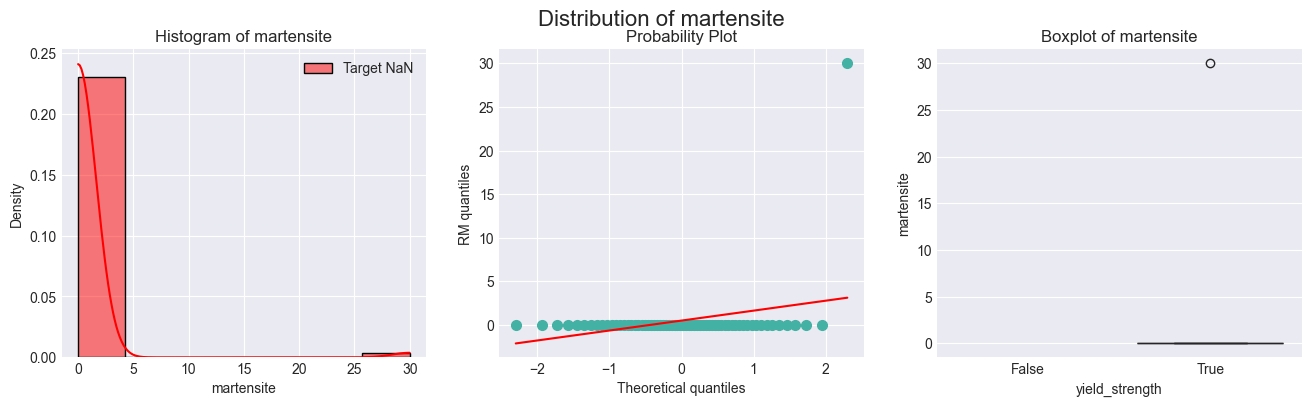

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




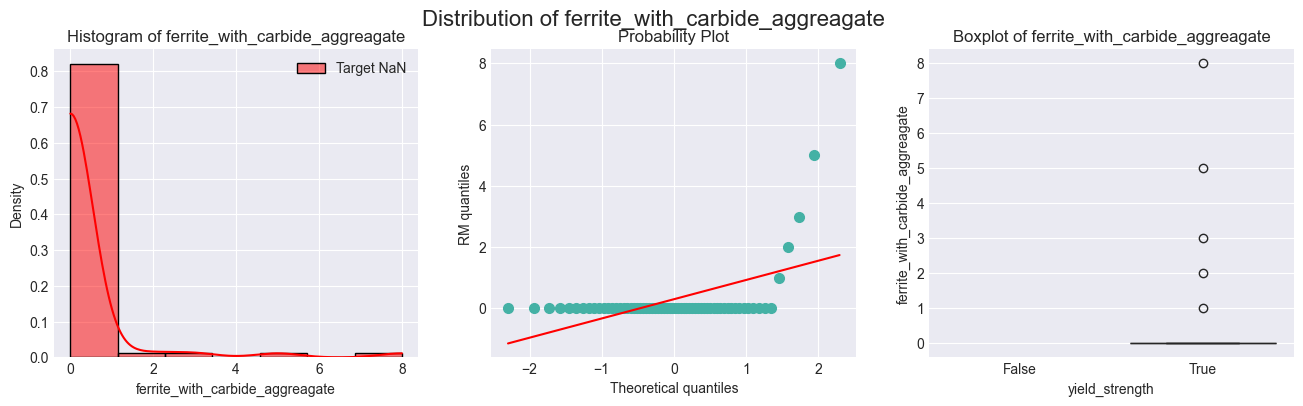

In [93]:
for feature in get_numerical_variables(X_train):
  if feature not in target_variable_names:
    diagnostic_plots(X_train,feature,target,'matplotlib')

We see a big differente in the distribution with the last features

# Test some semi-supervised models

## Let's load the processed dataset

In [79]:
def load_dataset(dataset):
    X_train = pd.read_csv(f'processed_data/{dataset}/processed_train_{dataset}.csv')

    y_train = pd.read_csv("data/train.csv")[target]

    X_valid = pd.read_csv(f'processed_data/{dataset}/processed_validation_{dataset}.csv')

    y_valid = pd.read_csv("data/validation.csv")[target]

    X_train = X_train.append(X_valid)
    X_train = X_train.reset_index(drop=True)

    y_train = y_train.append(y_valid)
    y_train = y_train.reset_index(drop=True)

    X_test = pd.read_csv(f'processed_data/{dataset}/processed_test_{dataset}.csv')

    y_test = pd.read_csv("data/test.csv")[target]



    return X_train, y_train, X_test, y_test

In [80]:
target_features=["yield_strength",
"ultimate_tensile_strength",]
target = target_features[0]

In [81]:
X_train, y_train, X_test, y_test = load_dataset("custom")

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\851372445.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\merte\AppData\Local\Temp\ipykernel_16764\851372445.py:13: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from typing import List

def plot_results(y_true: List[float], y_pred: List[float]) -> None:
    """
    Plot both the standardized residuals plot and the predicted vs true values plot side by side,
    with a common title that includes the R2 score.

    Args:
        y_true: List of true values.
        y_pred: List of predicted values.

    Returns:
        None

    Raises:
        ValueError: If y_true and y_pred have different lengths.
    """

    # Check if lengths are the same
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be the same.")

    # Calculate the residuals
    residuals = np.array(y_true) - np.array(y_pred)

    # Standardize the residuals
    std_residuals = residuals / np.std(residuals)

    # Calculate the R2 score
    r2 = r2_score(y_true, y_pred)

    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Common title with R2 score
    fig.suptitle(fr"Prediction Weld Quality = {r2:.2f}", fontsize=18)

    # Plot for standardized residuals
    axes[0].scatter(y_pred, std_residuals, c='blue')
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel("Predicted Values", fontsize=14)
    axes[0].set_ylabel("Standardized Residuals", fontsize=14)
    axes[0].set_title("Standardized Residuals Plot", fontsize=16)

    # Plot for y_true vs y_pred
    axes[1].scatter(y_pred, y_true, c='blue', label='Data')
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y')
    axes[1].set_xlabel("Predicted Values", fontsize=14)
    axes[1].set_ylabel("True Values", fontsize=14)
    axes[1].set_title("Predicted vs True Values", fontsize=16)
    axes[1].legend(fontsize=12)

    # Show the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## GANNs

Generative Adversarial Networks (GANs) can be adapted for semi-supervised learning in regression problems with tabular data, enabling models to leverage a large amount of unlabeled data to improve performance.

**Context and Motivation:**
In typical supervised regression tasks, models rely heavily on large labeled datasets to predict continuous outcomes. However, obtaining labeled data, especially in fields like industrial maintenance or financial forecasting, can be expensive or difficult. Semi-supervised learning, using a combination of labeled and unlabeled data, offers a way to improve model performance without needing a fully labeled dataset. GANs, originally used for generating images, can be adapted for this purpose.

**How GANs Work for Semi-Supervised Learning in Regression:**
In the GAN framework, there are two main components:

- Generator: Produces synthetic (fake) samples to mimic the distribution of real data.
- Discriminator: Determines whether a sample is real (from the dataset) or fake (from the generator).

**In semi-supervised learning:**

The discriminator is modified to not only distinguish between real and fake samples but also perform regression on real data. This allows the discriminator to output continuous values (e.g., predicting car suspension stiffness or damping parameters) instead of classifying discrete labels as in classification tasks.
The generator helps by producing synthetic examples, enriching the data diversity for the discriminator, particularly when working with limited labeled data.

The generator produces new data samples that can help the discriminator learn better representations, reducing overfitting. These synthetic examples can simulate potential variations in the data that the limited labeled examples may not capture.

The discriminator learns from both labeled and unlabeled data, leading to better generalization. Unlabeled real data still contributes to training by helping the model understand the true data distribution. This is crucial in regression tasks where data points with continuous outputs are sparse.

**Adaptation to Regression:**
- Discriminator Architecture: For regression, the discriminator’s output layer can be modified to produce a continuous output rather than a class probability. The network can be trained to minimize a regression loss (e.g., mean squared error) for labeled data, while simultaneously distinguishing real versus fake data using a traditional GAN loss.

- Loss Functions: The discriminator will have two objectives:

- - Predict accurate regression values for labeled data.
- - Distinguish real versus fake data for both labeled and unlabeled inputs.
- Feature Matching: A technique where the generator learns to produce synthetic samples whose features (e.g., statistical properties) match the real data distribution. This helps in generating more realistic tabular data, which can effectively guide the discriminator during training.





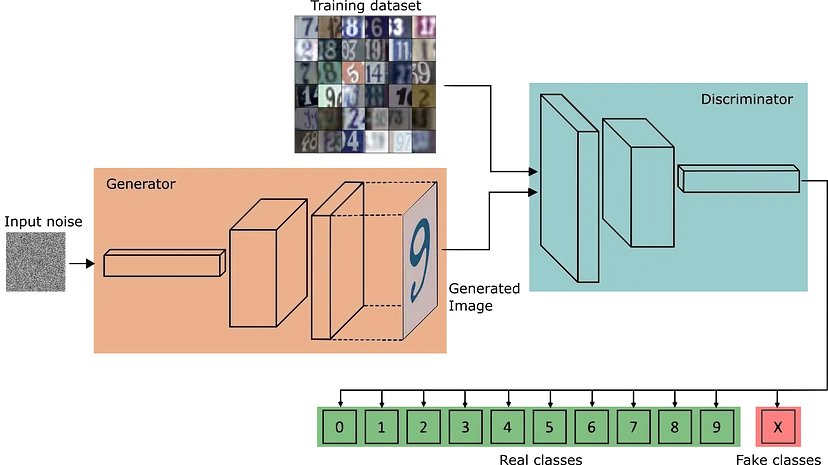

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, output_size),
        )
    
    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),  
        )
        
        self.regression_layer = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        features = self.model[:-1](x)
        gan_output = self.model[-1](features)
        regression_output = self.regression_layer(features)
        return gan_output, regression_output

def train_gann(X, y, input_size, hidden_size, n_epochs=1000, batch_size=128):
    generator = Generator(input_size, hidden_size, input_size).to(device)
    discriminator = Discriminator(input_size, hidden_size).to(device)

    optimizer_G = optim.Adam(generator.parameters(), lr=0.005)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.005)

    criterion_GAN = nn.BCEWithLogitsLoss()  
    criterion_regression = nn.MSELoss()  

    
    X_train = torch.tensor(X.values, dtype=torch.float32).to(device)
    y_train = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)
    mask_train = ~torch.isnan(y_train)
    y_train[torch.isnan(y_train)] = 0  

    for epoch in range(n_epochs):
        generator.train()
        discriminator.train()

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)


        optimizer_D.zero_grad()

        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]
        real_targets = y_train[idx]
        real_mask = mask_train[idx] 

        z = torch.randn(batch_size, input_size).to(device)
        fake_data = generator(z)

        real_gan_pred, real_regression_pred = discriminator(real_data)
        fake_gan_pred, _ = discriminator(fake_data)

        real_loss_gan = criterion_GAN(real_gan_pred, real_labels)
        fake_loss_gan = criterion_GAN(fake_gan_pred, fake_labels)
        
        regression_loss = criterion_regression(real_regression_pred[real_mask], real_targets[real_mask])

        d_loss = (real_loss_gan + fake_loss_gan) / 2 + regression_loss
        d_loss.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()

        z = torch.randn(batch_size, input_size).to(device)
        generated_data = generator(z)
        gan_pred, _ = discriminator(generated_data)

        g_loss = criterion_GAN(gan_pred, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{n_epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    
    return generator, discriminator

In [84]:
generator, discriminator = train_gann(X_train, y_train, X_train.shape[1], 500, n_epochs=1000)

Epoch 0/1000 | D Loss: 246779.5781 | G Loss: 0.6630
Epoch 10/1000 | D Loss: 148271.8281 | G Loss: 0.0000
Epoch 20/1000 | D Loss: 67408.1406 | G Loss: 0.0386
Epoch 30/1000 | D Loss: 34374.2383 | G Loss: 10.2548
Epoch 40/1000 | D Loss: 23280.1914 | G Loss: 69.6505
Epoch 50/1000 | D Loss: 22403.3691 | G Loss: 45.3374
Epoch 60/1000 | D Loss: 10912.4824 | G Loss: 16.5863
Epoch 70/1000 | D Loss: 11697.3945 | G Loss: 10.9412
Epoch 80/1000 | D Loss: 6211.6450 | G Loss: 0.0802
Epoch 90/1000 | D Loss: 3500.7424 | G Loss: 0.1724
Epoch 100/1000 | D Loss: 7145.3755 | G Loss: 1.3985
Epoch 110/1000 | D Loss: 6151.4155 | G Loss: 0.6375
Epoch 120/1000 | D Loss: 4417.8218 | G Loss: 0.1249
Epoch 130/1000 | D Loss: 4857.1157 | G Loss: 0.9598
Epoch 140/1000 | D Loss: 4636.4023 | G Loss: 1.8335
Epoch 150/1000 | D Loss: 3942.9485 | G Loss: 0.3407
Epoch 160/1000 | D Loss: 3361.6960 | G Loss: 0.4976
Epoch 170/1000 | D Loss: 2400.5076 | G Loss: 0.2136
Epoch 180/1000 | D Loss: 2332.4167 | G Loss: 0.3318
Epoch 19

In [85]:
def test_gann(discriminator, X, y):
    discriminator.eval() 
    X_test = torch.tensor(X.values, dtype=torch.float32).to(device)
    y_test = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)
    with torch.no_grad(): 
        _, y_pred = discriminator(X_test)
        y_pred = y_pred.cpu().numpy() 
        y_test = y_test.cpu().numpy()

    mask_test = ~np.isnan(y_test)
    y_pred = y_pred[mask_test]
    y_test = y_test[mask_test]

    mse = np.mean((y_pred - y_test)**2)
    print(f"MSE no conjunto de teste: {mse:.4f}")
    return y_pred, y_test

In [86]:
y_pred, y_tested = test_gann(discriminator, X_test, y_test)

MSE no conjunto de teste: 1851.5269


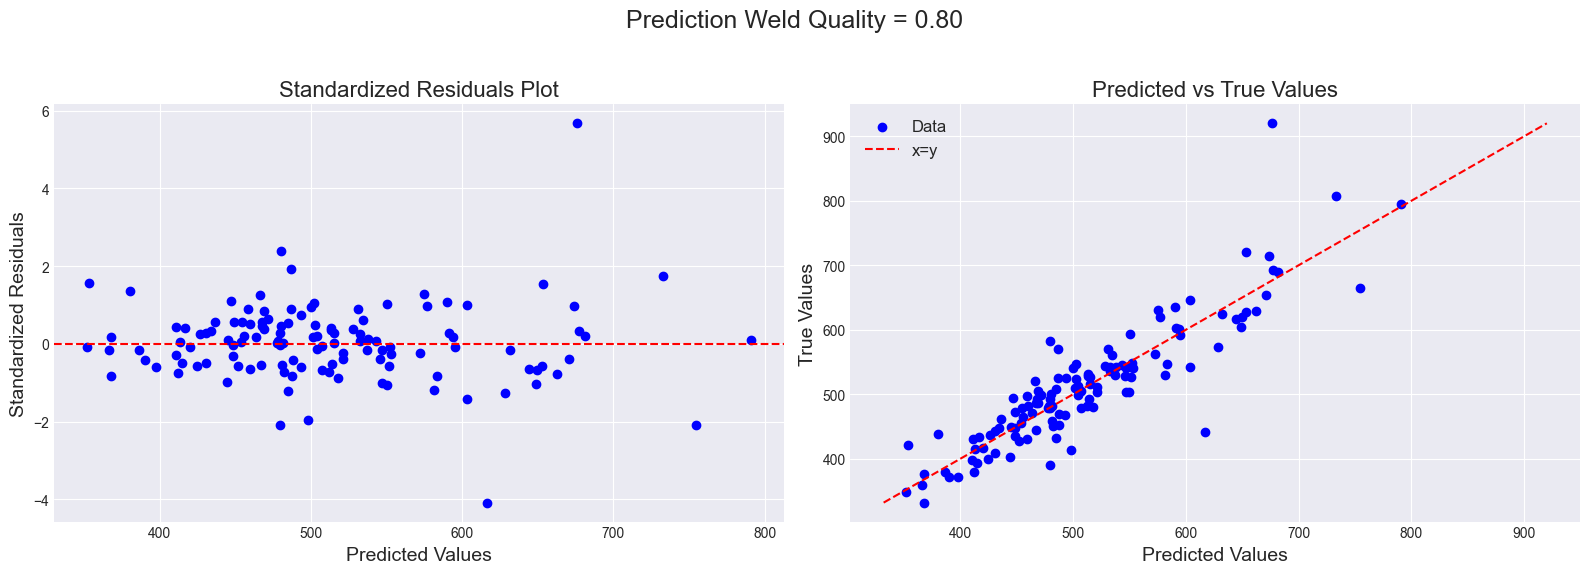

In [87]:
plot_results(y_tested, y_pred)

## Label Propagation

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

def fill_missing_with_extra_trees(X_train, y_train):
    not_nan_mask = ~np.isnan(y_train)
    nan_mask = np.isnan(y_train)
    
    model = ExtraTreesRegressor(n_estimators=200, random_state=42)
    model.fit(X_train[not_nan_mask], y_train[not_nan_mask])
    
    y_train_filled = y_train.copy()
    y_train_filled[nan_mask] = model.predict(X_train[nan_mask])
    
    return y_train_filled

In [34]:
def prepare_data(X_train, y_train, X_test, y_test):
    y_train = y_train.values if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train
    y_test = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test
    X_train = X_train.values if isinstance(X_train, (pd.DataFrame, pd.Series)) else X_train
    X_test = X_test.values if isinstance(X_test, (pd.DataFrame, pd.Series)) else X_test

    nan_mask = np.isnan(y_test)

    y_train_with_nan = np.concatenate([y_train, y_test[nan_mask]])
    X_train_with_nan = np.concatenate([X_train, X_test[nan_mask]])

    X_test_clean = X_test[~nan_mask]
    y_test_clean = y_test[~nan_mask]

    return X_train_with_nan, y_train_with_nan, X_test_clean, y_test_clean

In [35]:
from sklearn.metrics import mean_squared_error

def train_and_evaluate_extra_trees(X_train, y_train, X_test, y_test):
    extra_trees_model = ExtraTreesRegressor(n_estimators=200, random_state=42)
    extra_trees_model.fit(X_train, y_train)

    y_pred = extra_trees_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f'Extra Trees Regressor MSE: {mse:.4f}')
    
    return y_pred

In [36]:
X_train_with_nan, y_train_with_nan, X_test_clean, y_test_clean = prepare_data(X_train, y_train, X_test, y_test)

y_train_filled = fill_missing_with_extra_trees(X_train_with_nan, y_train_with_nan)

y_pred = train_and_evaluate_extra_trees(X_train_with_nan, y_train_filled, X_test_clean, y_test_clean)


Extra Trees Regressor MSE: 1505.0023


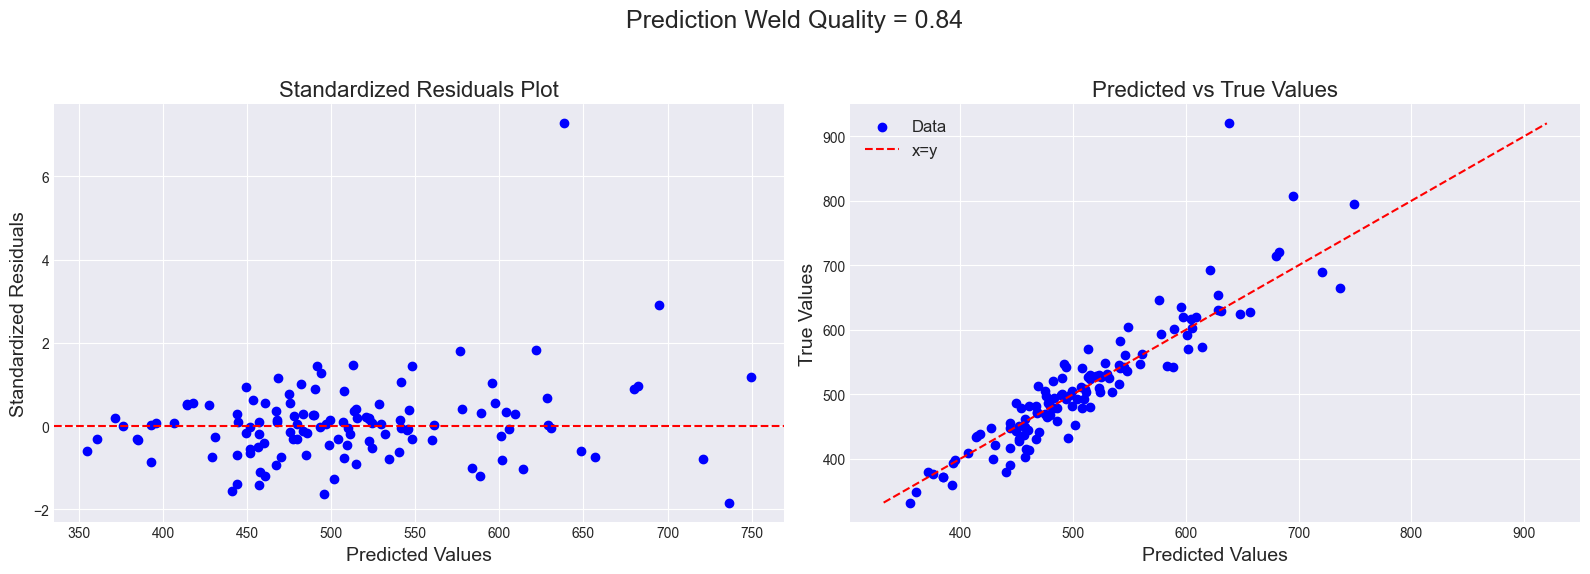

In [37]:
plot_results(y_test_clean, y_pred)

## VIME

VIME consists of two parts: self-supervised learning and semi-supervised learning. In self-supervised learning, VIME introduces two pretext tasks: feature vector estimation and mask vector estimation. The idea is to corrupt a sample by masking and replacing some of its features with noise and then train an encoder to recover the original sample and the mask vector from the corrupted sample. This way, the encoder learns to capture the correlation among features and generate informative representations. In semi-supervised learning, VIME uses the trained encoder to generate multiple augmented samples for each data point by masking and imputing different features. Then, VIME trains a predictive model by minimizing the supervised loss on the labeled data and the consistency loss on the augmented samples.



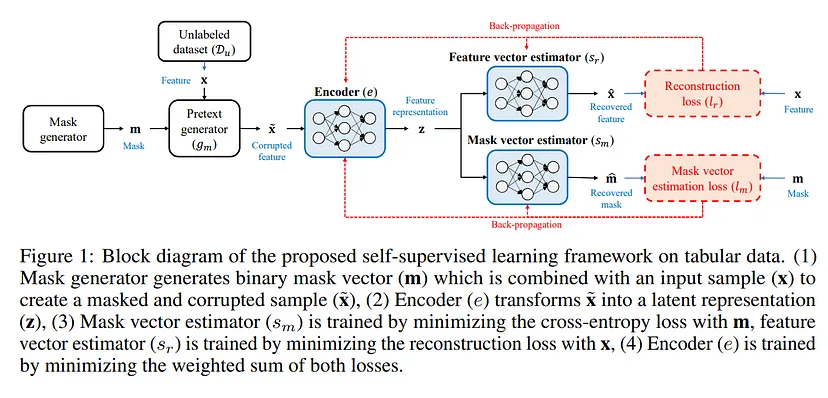

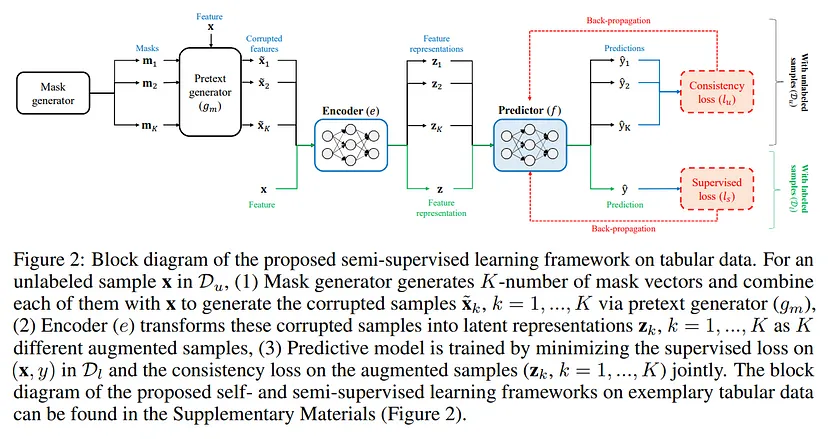

In [38]:
from sklearn.preprocessing import MinMaxScaler

def replace_outliers_with_mean(X_train, X_test):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for col in X_train.columns:
        mean_col = X_train[col].mean()
        X_train[col] = X_train[col].apply(lambda x: mean_col if x < lower_bound[col] or x > upper_bound[col] else x)
        X_test[col] = X_test[col].apply(lambda x: mean_col if x < lower_bound[col] or x > upper_bound[col] else x)
    
    return X_train, X_test

def normalize_data(X_train, X_test):
    scaler = MinMaxScaler()
    train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    return train_normalized, test_normalized

In [39]:
X_train_no_outliers, X_test_no_outliers = replace_outliers_with_mean(X_train, X_test)
X_train_normalized, X_test_normalized = normalize_data(X_train_no_outliers, X_test_no_outliers)

In [40]:
import numpy as np
import torch
from sklearn.metrics import mean_squared_error

def mask_generator(p_m, x):
    """Generate mask tensor in PyTorch.
    
    Args:
    - p_m: corruption probability
    - x: feature tensor
    
    Returns:
    - mask: binary mask tensor 
    """
    mask = torch.bernoulli(torch.full(x.shape, p_m)) 
    return mask

def pretext_generator(m, x):  
    """Generate corrupted samples in PyTorch.
  
    Args:
    m: mask tensor
    x: feature tensor
    
    Returns:
    m_new: final mask tensor after corruption
    x_tilde: corrupted feature tensor
    """
    # Parameters
    no, dim = x.shape  
    
    # Randomly (and column-wise) shuffle data
    x_bar = torch.zeros([no, dim])
    for i in range(dim):
        idx = torch.randperm(no)
        x_bar[:, i] = x[idx, i]
    
    # Corrupt samples
    x_tilde = x * (1 - m) + x_bar * m  
    # Define new mask tensor
    m_new = 1 * (x != x_tilde)

    return m_new, x_tilde

def perf_metric(metric, y_test, y_test_hat):
    """Evaluate performance in PyTorch.
  
    Args:
    - metric: mse
    - y_test: ground truth tensor
    - y_test_hat: predicted values tensor
    
    Returns:
    - performance: Mean Squared Error (MSE) performance
    """
    # Convert tensors to numpy arrays for sklearn metrics
    y_test = y_test.numpy()
    y_test_hat = y_test_hat.numpy()

    if metric == 'mse':
        result = mean_squared_error(y_test, y_test_hat)
    
    return result

def convert_matrix_to_vector(matrix):
    """Convert two dimensional tensor into one dimensional tensor in PyTorch
  
    Args:
    - matrix: two dimensional tensor
    
    Returns:
    - vector: one dimensional tensor
    """
    no, dim = matrix.shape
    vector = torch.zeros([no,], dtype=torch.float)
    for i in range(dim):
        idx = (matrix[:, i] == 1).nonzero()
        vector[idx] = i
    
    return vector

def convert_vector_to_matrix(vector):
    """Convert one dimensional tensor into two dimensional tensor in PyTorch
  
    Args:
    - vector: one dimensional tensor
    
    Returns:
    - matrix: two dimensional tensor
    """
    no = len(vector)
    dim = len(torch.unique(vector))
    matrix = torch.zeros([no, dim])
    for i in range(dim):
        idx = (vector == i).nonzero()
        matrix[idx, i] = 1
    
    return matrix


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim


class VIMEModel(nn.Module):
    def __init__(self, dim):
        super(VIMEModel, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(int(dim), dim * 2),
            nn.ReLU(),
            nn.Linear(dim * 2, dim),
            nn.ReLU(),
            nn.Linear(dim, dim // 2),
            nn.ReLU(),
            nn.Linear(dim // 2, dim)
        )

        # Mask estimator
        self.mask_estimator = nn.Linear(int(dim), dim)
        # Feature estimator
        self.feature_estimator = nn.Linear(int(dim), dim)
        
    def forward(self, x):
        # Encode the input
        hidden = torch.relu(self.encoder(x))
        # Estimate the mask
        mask_output = torch.sigmoid(self.mask_estimator(hidden))
        # Estimate the feature
        feature_output = torch.sigmoid(self.feature_estimator(hidden))
        # Return the mask and feature
        return mask_output, feature_output

def vime_self(x_unlab, p_m, alpha, parameters):
    # Parameters
    _, dim = x_unlab.shape # Get the number of dimensions of the data
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    
    # Initialize model and optimizer
    model = VIMEModel(dim)
    optimizer = optim.RMSprop(model.parameters(), lr=0.0005)
    
    # Losses
    criterion_mask = nn.BCELoss()
    criterion_feature = nn.MSELoss()
    
    # Generate mask m_unlab
    m_unlab = mask_generator(p_m, x_unlab)

    # Generate pretext task from the mask m_unlab and the unlabelled data x_unlab
    m_label, x_tilde = pretext_generator(m_unlab, x_unlab)
    
    # Convert PyTorch tensors to numpy arrays
    x_tilde = x_tilde.float()
    m_label = m_label.float()
    x_unlab = x_unlab.float()
    
    # Training loop
    for epoch in range(epochs):
        for i in range(0, len(x_unlab), batch_size):
            # Prepare minibatch
            inputs = x_tilde[i:i+batch_size]
            labels_mask = m_label[i:i+batch_size]
            labels_feature = x_unlab[i:i+batch_size]
            
            # Forward pass
            outputs_mask, outputs_feature = model(inputs)
            
            # Compute losses
            loss_mask = criterion_mask(outputs_mask, labels_mask)
            loss_feature = criterion_feature(outputs_feature, labels_feature)
            loss = loss_mask + alpha * loss_feature
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Return the encoder part of the model
    encoder = model.encoder
    return encoder

In [42]:
def prepare_data_vime(X_train, y_train, X_test, y_test):

    y_train = y_train.values if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train
    y_test = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test
    X_train = X_train.values if isinstance(X_train, (pd.DataFrame, pd.Series)) else X_train
    X_test = X_test.values if isinstance(X_test, (pd.DataFrame, pd.Series)) else X_test

    nan_mask_train = np.isnan(y_train)
    nan_mask_test = np.isnan(y_test)

    X_train_null = X_train[nan_mask_train]
    X_test_null = X_test[nan_mask_test]
    X_null = np.concatenate([X_train_null, X_test_null])

    X_train = X_train[~nan_mask_train]
    y_train = y_train[~nan_mask_train]

    X_test = X_test[~nan_mask_test]
    y_test = y_test[~nan_mask_test]

    return torch.tensor(X_train, dtype=torch.float32), \
    torch.tensor(y_train, dtype=torch.float32), torch.tensor(X_null, dtype=torch.float32), \
    torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [43]:
X_train_vime, y_train_vime, X_null_vime, X_test_vime, y_test_vime = prepare_data_vime(X_train_normalized, y_train, X_test_normalized, y_test)

In [44]:
p_m = 0.1
alpha = 1.0
parameters = {'epochs': 200, 'batch_size': 128}
encoder = vime_self(X_null_vime, p_m, alpha, parameters)


In [45]:

# Just a simple check to see if the encoder has been trained and can produce outputs
sample = X_null_vime[:5]
encoded_sample = encoder(sample)
print(encoded_sample)

tensor([[ 4.5260e+00, -8.1999e-01,  1.7382e+00,  6.5398e+00,  7.7943e-01,
          3.5695e-01, -8.6745e+00,  3.2303e+00,  6.3487e+00,  4.1170e+00,
          1.4656e+00, -7.1733e+00,  9.1845e-01,  6.5222e+00, -6.4721e+00,
         -4.4995e-01, -4.6928e+00,  6.1741e+00, -3.2059e+00, -4.1689e+00,
          6.0627e+00,  4.1129e+00,  4.5880e+00,  2.4840e+00,  1.8875e+00,
          2.9724e+00,  2.6818e+00,  8.4325e-01,  9.4713e+00,  5.5831e+00,
          2.2071e+00,  5.1888e+00,  4.9787e+00,  1.8296e+00,  6.2713e+00,
         -5.3909e+00,  3.4592e+00,  2.4956e+00,  3.5950e+00,  2.0506e-01,
          7.2593e-01,  4.6298e+00,  5.0970e+00, -1.1308e+00, -2.5612e+00],
        [-2.5695e+00, -4.6214e+00,  4.0904e+00,  7.9942e-01,  2.7904e+00,
         -5.1371e-01, -2.8410e+00,  4.5761e+00,  3.5566e+00,  7.6699e+00,
          5.3112e+00, -1.9789e+00,  2.3861e+00,  5.9203e+00,  1.4657e+00,
          2.7340e+00, -4.5073e+00,  8.3443e+00, -9.5593e+00,  2.3732e+00,
          6.9090e+00,  4.9945e-01,  9

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim


class Predictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

def vime_semi(x_train, y_train, x_unlab, x_test, parameters, 
              p_m, K, beta, encoder_model):
    # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    device = 'cpu'
    # Parameters
    hidden_dim = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    iterations = parameters['iterations']
    learning_rate = parameters['learning_rate']
    data_dim = x_train.size(1)
    label_dim = 1

    # Convert numpy arrays to PyTorch tensors and move to device
    x_train, y_train, x_unlab, x_test = [torch.tensor(data).to(device).float() for data in [x_train, y_train, x_unlab, x_test]]

    # Model, criterion, and optimizer
    model = Predictor(data_dim, hidden_dim, label_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    # Training loop
    for it in range(iterations):
        # Labeled data batch
        idx = torch.randint(0, len(x_train), (batch_size,))
        x_batch, y_batch = x_train[idx], y_train[idx]

        # Unlabeled data batch
        idx_unlab = torch.randint(0, len(x_unlab), (batch_size,))
        xu_batch_ori = x_unlab[idx_unlab]

        xu_batch_list = []
        for _ in range(K):
            m_batch = mask_generator(p_m, xu_batch_ori)
            _, xu_batch_temp = pretext_generator(m_batch, xu_batch_ori)
            xu_batch_temp = encoder_model(xu_batch_temp)
            xu_batch_list.append(xu_batch_temp)
        
        xu_batch = torch.stack(xu_batch_list, dim=1)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_hat = model(x_batch)
        yu_hat = model(xu_batch)
        
        # Calculate the loss
        loss_supervised = criterion(y_hat, y_batch)
        loss_unsupervised = torch.mean((yu_hat[:, 0] - yu_hat[:, 1])**2)
        loss = loss_supervised + beta * loss_unsupervised

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if it % 100 == 0:
            print(f"Iteration {it}/{iterations}, Loss: {loss.item()}")

    # Testing
    with torch.no_grad():
        y_test_hat = model(x_test)
        
    return y_test_hat

In [47]:
semi_parameters = {
    'hidden_dim': 64,
    'batch_size': 32,
    'iterations': 500,
    'learning_rate': 0.001
}

K = 3
beta = 0.01

p_m = 0.2
alpha = 0.5
self_parameters = {'epochs': 100, 'batch_size': 64}
encoder = vime_self(X_null_vime, p_m, alpha, self_parameters)

encoder = encoder.eval()  # Set the encoder to evaluation mode

# Train the predictor model using the semi-supervised approach
# X_train_vime, y_train_vime, X_null_vime, X_test_vime, y_test_vime
y_test_hat = vime_semi(X_train_vime, y_train_vime, X_null_vime, X_test_vime, semi_parameters, p_m, K, beta, encoder)

# Evaluate the results
predicted_labels = torch.argmax(y_test_hat, axis=1)


C:\Users\merte\AppData\Local\Temp\ipykernel_16764\4148077181.py:32: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

c:\Users\merte\miniconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning:

Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Iteration 0/500, Loss: 242415.65625
Iteration 100/500, Loss: 159294.078125
Iteration 200/500, Loss: 9312.3037109375
Iteration 300/500, Loss: 11208.837890625
Iteration 400/500, Loss: 9005.7802734375


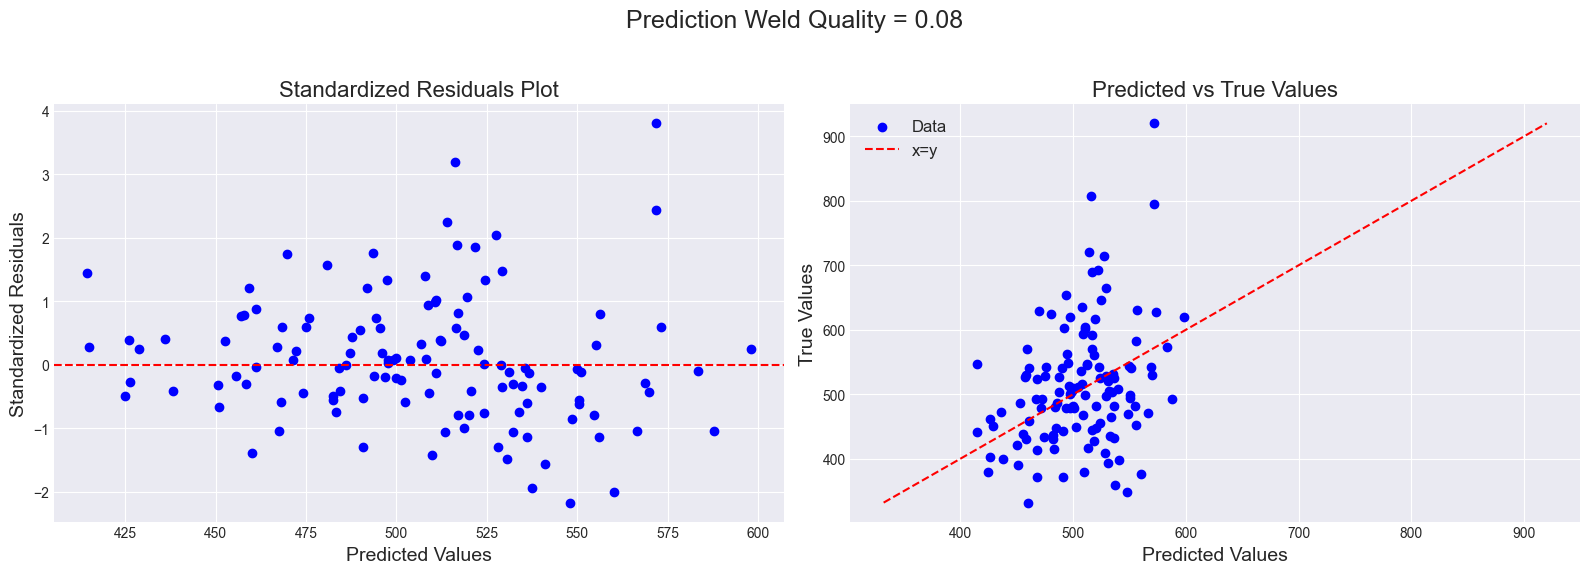

In [48]:
plot_results(y_test_vime, y_test_hat.T[0])